# The use of LQR to trade off "error" and "effort"

In [1]:
import numpy as np
from scipy import linalg
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook

This function returns the cost

$$ q x(t)^2 + r u(t)^2 $$

assuming that linear state feedback

$$ u = -k x $$

is applied to the (scalar) state-space system

$$ \dot{x} = ax + bu $$

starting from the initial condition

$$ x(t_0) = x_0. $$

In [2]:
def integrand(t, a, b, q, r, k, x0, t0):
    x = np.exp((a - b * k) * (t - t0)) * x0
    u = - k * x
    return q * x**2 + r * u**2

This function returns the total cost

$$ \int_{t_0}^{t_1} \left( q x(t)^2 + r u(t)^2 \right) dt $$

for the same controller, system, and initial condition.

In [3]:
def get_cost(a, b, q, r, k, x0, t0, t1):
    cost, err = integrate.quad(integrand, t0, t1, args=(a, b, q, r, k, x0, t0))
    return cost

Choose parameters:

Create figure:

<IPython.core.display.Javascript object>


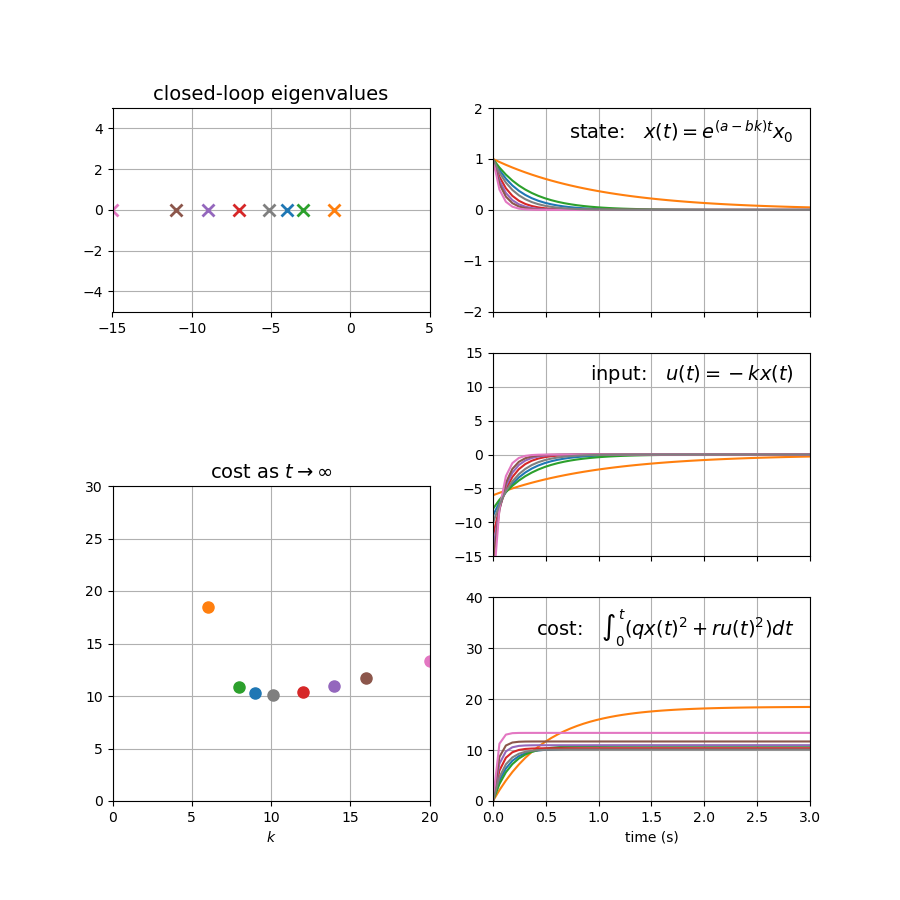

Text(0.5, 0, '$k$')

In [4]:
fig = plt.figure(figsize=(9, 9), tight_layout=True)
ax_x = plt.subplot(322)
ax_x.set_xlim(0, 3)
ax_x.set_ylim(-2, 2)
ax_u = plt.subplot(324, sharex=ax_x)
ax_u.set_ylim(-15, 15)
ax_cost = plt.subplot(326, sharex=ax_x)
ax_cost.set_ylim(0, 40)

ax_eig = plt.subplot(321)
ax_eig.set_xlim(-15, 5)
ax_eig.set_ylim(-5, 5)

ax_costatinfinity = plt.subplot(223)
ax_costatinfinity.set_xlim(0, 20)
ax_costatinfinity.set_ylim(0, 30)

ax_x.tick_params(labelbottom=False)
ax_u.tick_params(labelbottom=False)
ax_cost.set_xlabel('time (s)')

ax_x.text(0.95, 0.95, 'state:   $x(t) = e^{(a - bk)t} x_0$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_x.transAxes,
          fontsize=14)
ax_u.text(0.95, 0.95, 'input:   $u(t) = -k x(t)$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_u.transAxes,
          fontsize=14)
ax_cost.text(0.95, 0.95, 'cost:   $\int_0^t (qx(t)^2 + ru(t)^2) dt$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_cost.transAxes,
          fontsize=14)
ax_eig.set_title('closed-loop eigenvalues', fontsize=14)
ax_costatinfinity.set_title('cost as $t\\rightarrow\\infty$', fontsize=14)

ax_x.grid()
ax_u.grid()
ax_cost.grid()
ax_eig.grid()
ax_costatinfinity.grid()

ax_costatinfinity.set_xlabel('$k$')

Add plots that correspond to a particular choice of gain to the figure (change the gain and repeat):

In [13]:
# Parameters that define the state-space model
a = 5.
b = 1.

# Parameters that define the cost
q = 1.
r = 1.

# Parameters that define the initial condition
x0 = 1.
t0 = 0.

# Pick gain
k = 10.099019513592777

# Get eigenvalue
s = a - b * k

# Get the state, input, and cost as functions of time
t = np.linspace(0., 3.)
x = np.exp((a - b * k) * (t - t0)) * x0
u = - k * x
cost = np.array([get_cost(a, b, q, r, k, x0, t0, t1) for t1 in t])

# Get the cost at infinity
cost_at_infinity = get_cost(a, b, q, r, k, x0, t0, np.inf)

# Plot everything
ax_x.plot(t, x)
ax_u.plot(t, u)
ax_cost.plot(t, cost)
ax_eig.plot(s, 0, 'x', markersize=8, markeredgewidth=2)
ax_costatinfinity.plot(k, cost_at_infinity, '.', markersize=16)

It is clear that the plot of total cost as a function of $k$ has a minimum. It is possible to find this minimum:

In [12]:
# Define state-space system
A = np.array([[a]])
B = np.array([[b]])

# Define weights
Q = np.diag([q])
R = np.diag([r])

# Find optimal cost matrix
P = linalg.solve_continuous_are(A, B, Q, R)

# Find optimal gain matrix
K = linalg.inv(R) @  B.T @ P
print(f'K = {K.tolist()}')

K = [[10.099019513592777]]


## Effect of changing initial condition

<IPython.core.display.Javascript object>


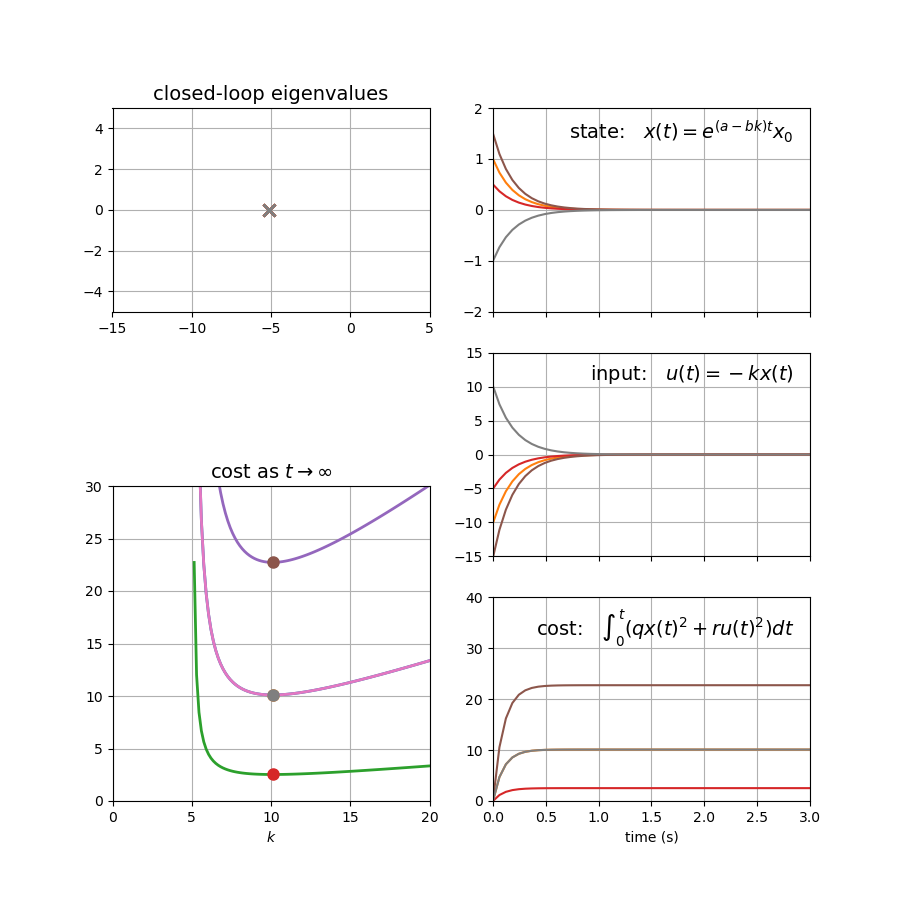

Text(0.5, 0, '$k$')

In [14]:
fig = plt.figure(figsize=(9, 9), tight_layout=True)
ax_x = plt.subplot(322)
ax_x.set_xlim(0, 3)
ax_x.set_ylim(-2, 2)
ax_u = plt.subplot(324, sharex=ax_x)
ax_u.set_ylim(-15, 15)
ax_cost = plt.subplot(326, sharex=ax_x)
ax_cost.set_ylim(0, 40)

ax_eig = plt.subplot(321)
ax_eig.set_xlim(-15, 5)
ax_eig.set_ylim(-5, 5)

ax_costatinfinity = plt.subplot(223)
ax_costatinfinity.set_xlim(0, 20)
ax_costatinfinity.set_ylim(0, 30)

ax_x.tick_params(labelbottom=False)
ax_u.tick_params(labelbottom=False)
ax_cost.set_xlabel('time (s)')

ax_x.text(0.95, 0.95, 'state:   $x(t) = e^{(a - bk)t} x_0$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_x.transAxes,
          fontsize=14)
ax_u.text(0.95, 0.95, 'input:   $u(t) = -k x(t)$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_u.transAxes,
          fontsize=14)
ax_cost.text(0.95, 0.95, 'cost:   $\int_0^t (qx(t)^2 + ru(t)^2) dt$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_cost.transAxes,
          fontsize=14)
ax_eig.set_title('closed-loop eigenvalues', fontsize=14)
ax_costatinfinity.set_title('cost as $t\\rightarrow\\infty$', fontsize=14)

ax_x.grid()
ax_u.grid()
ax_cost.grid()
ax_eig.grid()
ax_costatinfinity.grid()

ax_costatinfinity.set_xlabel('$k$')

In [18]:
# Parameters that define the state-space model
a = 5.
b = 1.

# Parameters that define the cost
q = 1.
r = 1.

# Parameters that define the initial condition
x0 = -1.
t0 = 0.

###
# Plot cost as a function of k
k_vals = np.linspace(5, 20, 100)[1:]
c_vals = []
for k in k_vals:
    c_vals.append(get_cost(a, b, q, r, k, x0, t0, np.inf))
c_vals = np.array(c_vals)
ax_costatinfinity.plot(k_vals, c_vals, '-', linewidth=2)

###
# Plot everything for k that minimizes cost...

# Define state-space system
A = np.array([[a]])
B = np.array([[b]])

# Define weights
Q = np.diag([q])
R = np.diag([r])

# Find optimal cost matrix
P = linalg.solve_continuous_are(A, B, Q, R)

# Find optimal gain matrix
K = linalg.inv(R) @  B.T @ P
print(f'K = {K.tolist()}')

# Extract optimal gain
k = K.item()

# Get eigenvalue
s = a - b * k

# Get the state, input, and cost as functions of time
t = np.linspace(0., 3.)
x = np.exp((a - b * k) * (t - t0)) * x0
u = - k * x
cost = np.array([get_cost(a, b, q, r, k, x0, t0, t1) for t1 in t])

# Get the cost at infinity
cost_at_infinity = get_cost(a, b, q, r, k, x0, t0, np.inf)

# Plot everything
curplot = ax_costatinfinity.plot(k, cost_at_infinity, '.', markersize=16)
curcolor = curplot[0].get_color()
ax_x.plot(t, x, color=curcolor)
ax_u.plot(t, u, color=curcolor)
ax_cost.plot(t, cost, color=curcolor)
ax_eig.plot(s, 0, 'x', markersize=8, markeredgewidth=2, color=curcolor)

K = [[10.099019513592777]]


The optimal cost as a function of $x_0$ is

$$ x_0^T P x_0 $$

or, if everything is a scalar, we could simply write

$$px_0^2$$

In [ ]:
# Define initial condition properly as a matrix
x0 = np.array([[x0]])

# Compute total cost for optimal K
total_cost = (x0.T @ P @ x0).item()
print(f'total_cost = {total_cost}')

# Compute this same total cost, assuming everything is a scalar
x0 = x0.item()
p = P.item()
total_cost = p * x0**2
print(f'total_cost = {total_cost}')

## Effect of changing weights

<IPython.core.display.Javascript object>


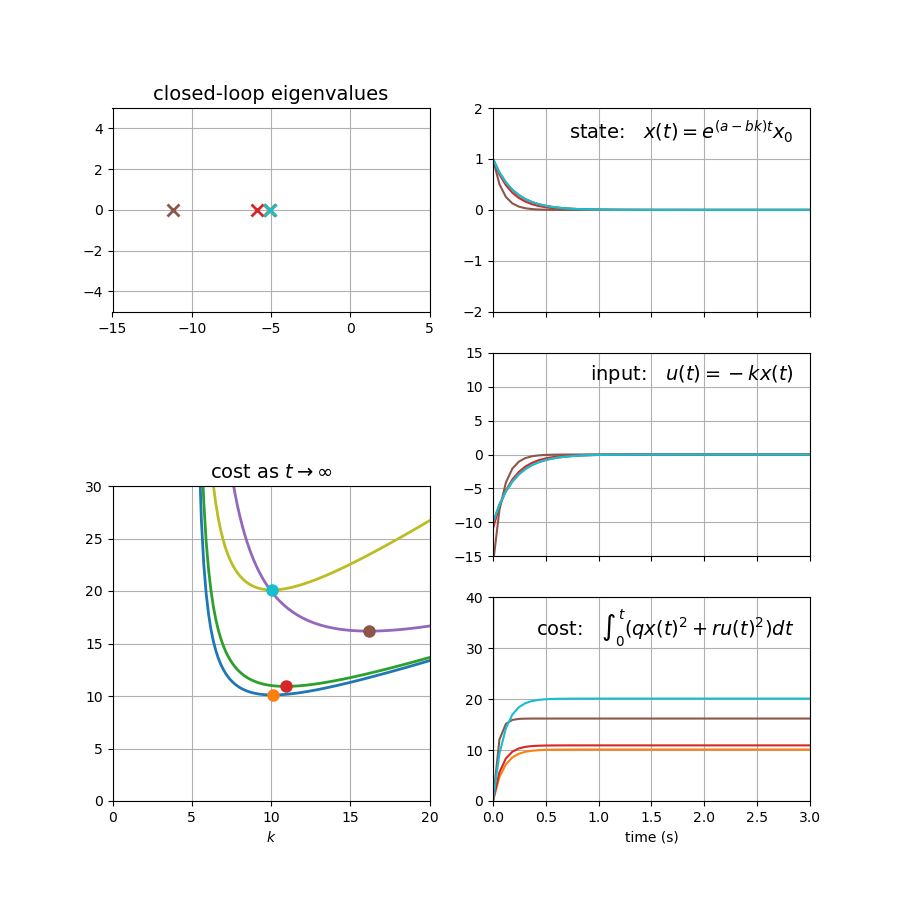

Text(0.5, 0, '$k$')

In [19]:
fig = plt.figure(figsize=(9, 9), tight_layout=True)
ax_x = plt.subplot(322)
ax_x.set_xlim(0, 3)
ax_x.set_ylim(-2, 2)
ax_u = plt.subplot(324, sharex=ax_x)
ax_u.set_ylim(-15, 15)
ax_cost = plt.subplot(326, sharex=ax_x)
ax_cost.set_ylim(0, 40)

ax_eig = plt.subplot(321)
ax_eig.set_xlim(-15, 5)
ax_eig.set_ylim(-5, 5)

ax_costatinfinity = plt.subplot(223)
ax_costatinfinity.set_xlim(0, 20)
ax_costatinfinity.set_ylim(0, 30)

ax_x.tick_params(labelbottom=False)
ax_u.tick_params(labelbottom=False)
ax_cost.set_xlabel('time (s)')

ax_x.text(0.95, 0.95, 'state:   $x(t) = e^{(a - bk)t} x_0$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_x.transAxes,
          fontsize=14)
ax_u.text(0.95, 0.95, 'input:   $u(t) = -k x(t)$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_u.transAxes,
          fontsize=14)
ax_cost.text(0.95, 0.95, 'cost:   $\int_0^t (qx(t)^2 + ru(t)^2) dt$',
          verticalalignment='top',
          horizontalalignment='right',
          transform=ax_cost.transAxes,
          fontsize=14)
ax_eig.set_title('closed-loop eigenvalues', fontsize=14)
ax_costatinfinity.set_title('cost as $t\\rightarrow\\infty$', fontsize=14)

ax_x.grid()
ax_u.grid()
ax_cost.grid()
ax_eig.grid()
ax_costatinfinity.grid()

ax_costatinfinity.set_xlabel('$k$')

In [24]:
# Parameters that define the state-space model
a = 5.
b = 1.

# Parameters that define the cost
q = 1.
r = 2.

# Parameters that define the initial condition
x0 = 1.
t0 = 0.

###
# Plot cost as a function of k
k_vals = np.linspace(5, 20, 100)[1:]
c_vals = []
for k in k_vals:
    c_vals.append(get_cost(a, b, q, r, k, x0, t0, np.inf))
c_vals = np.array(c_vals)
ax_costatinfinity.plot(k_vals, c_vals, '-', linewidth=2)

###
# Plot everything for k that minimizes cost...

# Define state-space system
A = np.array([[a]])
B = np.array([[b]])

# Define weights
Q = np.diag([q])
R = np.diag([r])

# Find optimal cost matrix
P = linalg.solve_continuous_are(A, B, Q, R)

# Find optimal gain matrix
K = linalg.inv(R) @  B.T @ P
print(f'K = {K.tolist()}')

# Extract optimal gain
k = K.item()

# Get eigenvalue
s = a - b * k

# Get the state, input, and cost as functions of time
t = np.linspace(0., 3.)
x = np.exp((a - b * k) * (t - t0)) * x0
u = - k * x
cost = np.array([get_cost(a, b, q, r, k, x0, t0, t1) for t1 in t])

# Get the cost at infinity
cost_at_infinity = get_cost(a, b, q, r, k, x0, t0, np.inf)

# Plot everything
curplot = ax_costatinfinity.plot(k, cost_at_infinity, '.', markersize=16)
curcolor = curplot[0].get_color()
ax_x.plot(t, x, color=curcolor)
ax_u.plot(t, u, color=curcolor)
ax_cost.plot(t, cost, color=curcolor)
ax_eig.plot(s, 0, 'x', markersize=8, markeredgewidth=2, color=curcolor)

K = [[10.04975246918103]]


The optimal cost as a function of $x_0$ is

$$ x_0^T P x_0 $$

or, if everything is a scalar, we could simply write

$$px_0^2$$

In [ ]:
# Define initial condition properly as a matrix
x0 = np.array([[x0]])

# Compute total cost for optimal K
total_cost = (x0.T @ P @ x0).item()
print(f'total_cost = {total_cost}')

# Compute this same total cost, assuming everything is a scalar
x0 = x0.item()
p = P.item()
total_cost = p * x0**2
print(f'total_cost = {total_cost}')